# Der Ruin des Spielers


In dieser Fallstudie studieren wir unsere Gewinnchancen beim Spielen im Casino. Insbesondere wollen wir am Ende folgende Frage beantworten können:

> Angenommen wir gehen mit einem bestimmten Anfangsbudget ins Casino und unser Ziel ist es, einen bestimmten Zielbetrag zu erreichen. Dabei setzen wir jeweils immer einen fixen Betrag. Was ist die Wahrscheinlichkeit, dass wir gewinnen (d.h. den Zielbetrag erreichen) und was ist die Wahrscheinlichkeit, dass wir dabei Bankrott gehen?

Dabei werden wir sehen, wie uns Funktionen und Prozeduren helfen eine Aufgabe zu strukturieren. 
Zudem lernen wir auch, wie wir in einer Simulation Zufallszahlen nutzen können. 


### Ein Spiel simulieren

Nun nutzen wir diese Zufallsfunktion um ein [Roulettespiel](https://de.wikipedia.org/wiki/Roulette) zu simulieren. Wir schreiben uns dafür eine Funktion. Diese bekommt als Argument unseren Einsatz, und gibt unseren Gewinn zurück. Was wir zurückbekommen ist zwei mal der Einsatz im Gewinnfall, oder 0 falls wir nicht gewinnen. Wir setzen dabei immer nur auf eine der Farben und schliessen nie andere Wetten ab.Da es keinen Unterschied für die Gewinnchancen macht ob wir auf Rot oder Schwarz setzen, bilden wir dies in unserer Funktion nicht ab. Wir implementieren nur die Tatsache, dass wir in 19 von 37 Fällen verlieren und in 18 gewinnen. 

In [1]:
import random

def play_game(bet): 
    random_number = random.randint(0, 36)
    if random_number == 0:
        return 0
    elif random_number <= 18:
        return 0
    else: 
        return 2 * bet

In [2]:
play_game(5)

0

### Histogram der Gewinne

Wir können nun versuchen verschiedene Aspekte dieser Simulation zu visualisieren. Zuerst plotten wir, wie oft wir gewinnen. 

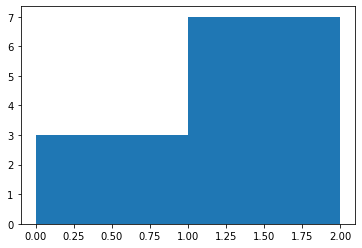

In [49]:
from matplotlib.pyplot import *


results = []
for i in range(0,10):
    results.append(play_game(1))

hist(results, bins=2)
show()

### Spielen mit Zielbetrag

Statt auf ein einziges Spiel, fokussieren wir uns nun auf eine Serie von Spielen. Dabei verwenden wir die folgende Strategie:
- Wir spielen so lange weiter, bis wir einen bestimmten Zielbetrag erreicht haben.
- Wenn wir aber kein Geld mehr haben, dann müssen wir aufhören zu spielen.

Da wir schon die Funktion ```play_game``` geschrieben haben, können wir diese hier wiederverwenden. Wir nutzen diese Funktion als *black box*, d.h. wir müssen gar nicht wissen, wie die Funktion implementiert ist oder welches Spiel da eigentlich simuliert wird. Wichtig ist nur, dass wir wissen, wie wir die Funktion aufrufen und dass der Rückgabewert jeweils unser Gewinn oder Verlust ist.

Die folgende Funktion soll dann `True` zurück geben wenn wir das Ziel erreicht haben oder `False` wenn wir bankkrott sind.

In [50]:

def play_until_target_reached_or_ruined(initial_amount, bet, target_amount):
    balance = initial_amount

    balances = []
    
    while balance >= bet and balance < target_amount:
        balance = balance - bet
        balance = balance + play_game(bet)
        balances.append[balance]

    return (balance >= target_amount, balances

In [45]:
play_until_target_reached_or_ruined(100, 10, 101)

True

### Simulation - Was ist unsere Gewinnwahrscheinlichkeit?

Zum Schluss schreiben wir uns eine Funktion, die uns eine Anzahl Versuche simuliert und dabei zählt, wie oft wir unser Ziel erreichen und wie oft wir bankrott gehen. Auch hier nutzen wir nun wieder die zuvor definierte Funktion.

In [46]:
def count_wins_in_n_games(number_of_tries, initial_amount, bet_per_game, target_amount):

    num_wins = 0

    i = 0
    while i < number_of_tries:
        if play_until_target_reached_or_ruined(initial_amount, bet_per_game, target_amount) == True:
            num_wins = num_wins + 1
        i += 1

    return num_wins

Um die Gewinnwahrscheinlichkeit zu berechnen, müssen wir nur nur diese Funktion aufrufen und den Anteil an Gewinnen 

In [47]:
number_of_games = 1000
target_amount = 300
initial_amount = 200
bet = 10
number_of_wins = count_wins_in_n_games(number_of_games, initial_amount, bet, target_amount)

probability_to_win = number_of_wins / number_of_games
probability_to_lose = (number_of_games - number_of_wins) / number_of_games
expected_win = probability_to_win * (target_amount - initial_amount ) + probability_to_lose * (-initial_amount)
print("Wahrscheinlichkeit zu gewinnen: ", probability_to_win)
print("Wahrscheinlichkeit zu verlieren ", probability_to_lose)
print("Erwarteter Gewinn ", expected_win)


Wahrscheinlichkeit zu gewinnen:  0.474
Wahrscheinlichkeit zu verlieren  0.526
Erwarteter Gewinn  -57.800000000000004
